# Mest sökta utbildningar 2024-2025

In [140]:
df_top_omraden = db.query(
    """
    SELECT 
      "Sökt utbildningsområde" AS UTBILDNINGSOMRÅDE,
      SUM("Sökt antal platser 2024") AS År2024,
      SUM("Sökt antal platser 2025") AS År2025,
      SUM("Sökt antal platser 2025") - SUM("Sökt antal platser 2024") AS Tillväxt
    FROM df
    GROUP BY "Sökt utbildningsområde"
    ORDER BY Tillväxt DESC
    LIMIT 10
    """
).df().set_index("UTBILDNINGSOMRÅDE")

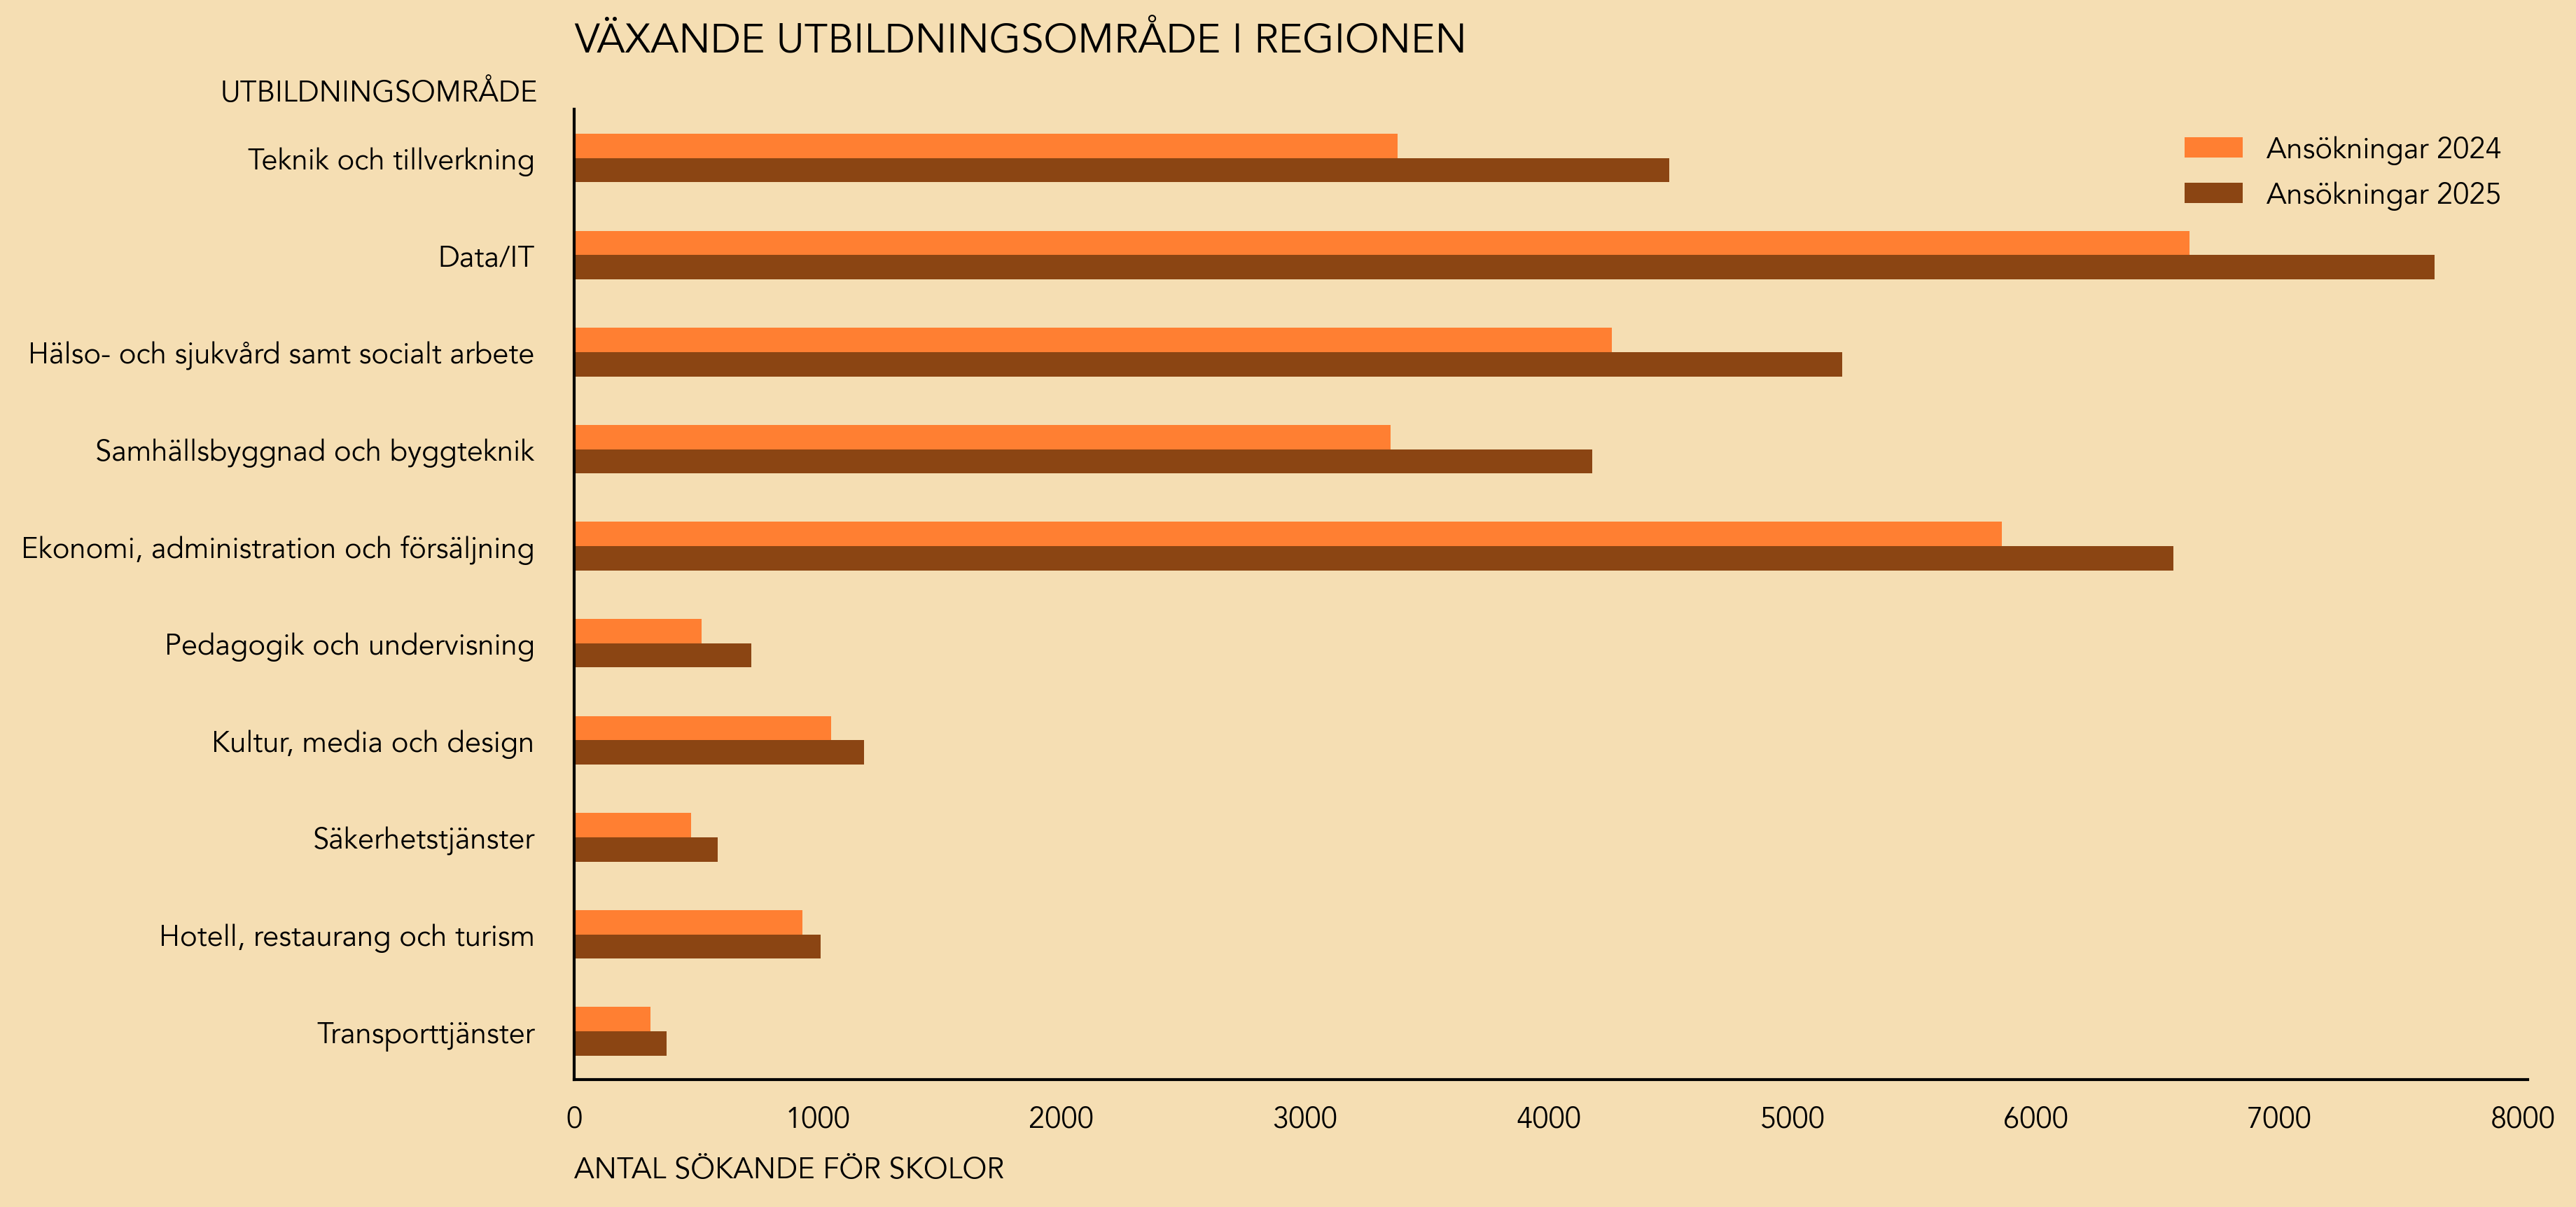

In [141]:
from utils.constant import DARK_ORANGE, SADDLEBROWN, WHEAT_BROWN

# Skapa diagrammet med anpassade färger
ax = df_top_omraden[["År2024", "År2025"]].plot(
    kind="barh",
    figsize=(12, 6),
    color=["#FF7F32", "#8B4513"],  # Orange för 2024, brun för 2025
)

# Titel och axelinställningar
ax.set_title("VÄXANDE UTBILDNINGSOMRÅDE I REGIONEN", loc="left", pad=20)
ax.set_xlabel("ANTAL SÖKANDE FÖR SKOLOR", loc="left")
ax.set_ylabel("UTBILDNINGSOMRÅDE", rotation=0)
ax.yaxis.set_label_coords(-0.1, 1)

# Bakgrundsfärg
ax.patch.set_facecolor(WHEAT_BROWN)

# Vänd y-axeln så att största stapeln är överst
ax.invert_yaxis()

# Anpassad legend
ax.legend(["Ansökningar 2024", "Ansökningar 2025"], loc="upper right", frameon=False)